In [1]:
import craft_utils
from PIL import Image, ImageDraw
import numpy as np


In [10]:
image = Image.open('test_data/test_img.png').convert("RGB")
mask = np.load('test_data/test_heatmap.npy')
boxes, _ ,_= craft_utils.getDetBoxes(mask[:,:,0], mask[:,:,1], 0.3, 0.3, 0.5)# change threshold
boxes1, _ ,_= craft_utils.getDetBoxes(mask[:,:,0], mask[:,:,1], 0.5, 0.5, 0.5)# change threshold


In [11]:
draw = ImageDraw.Draw(image)
bbox_color = (255, 0, 0)  
bbox_width = 1

for bbox in boxes:
    x1, y1, x2, y2 = bbox
    draw.rectangle([x1, y1, x2, y2], outline=bbox_color, width=bbox_width)


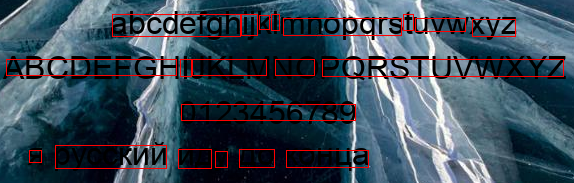

In [12]:
image


In [27]:
import numpy as np

def bbox_to_binary_mask(bboxes, image_size):
   
    height, width = image_size
    binary_mask = np.zeros((height, width), dtype=np.uint8)
    
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        # Clip coordinates to ensure they fall within image bounds
        x_min = max(0, min(width, int(x_min)))
        y_min = max(0, min(height, int(y_min)))
        x_max = max(0, min(width, int(x_max)))
        y_max = max(0, min(height, int(y_max)))
        
        # Set the region within the bounding box to 1
        binary_mask[y_min:y_max, x_min:x_max] = 1
    
    return binary_mask.astype(bool)

In [28]:
boxes_mask = bbox_to_binary_mask(boxes,image.size)
boxes_mask1 = bbox_to_binary_mask(boxes1,image.size)

In [29]:
def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    return intersection / union if union != 0 else 0.0

In [30]:
calculate_iou(boxes_mask,boxes_mask1)

0.6317980022197558

In [ ]:
# нужно добавить какой-нибудь штраф за края, лучше взять побольше, но при этом не пересечься, чем резануть текс"